In [38]:
%matplotlib notebook
import pandas as pd

filename = 'wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename, header=31, 
                 na_values=-999, parse_dates=[[8,9]])

In [39]:
# See the column names
df.columns

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO',
       'BTLNBR', 'BTLNBR_FLAG_W', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'CTDPRS',
       'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W', 'SILCAT',
       'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT', 'NITRIT_FLAG_W',
       'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT', 'PH_TOT_FLAG_W',
       'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA'],
      dtype='object')

<IPython.core.display.Javascript object>


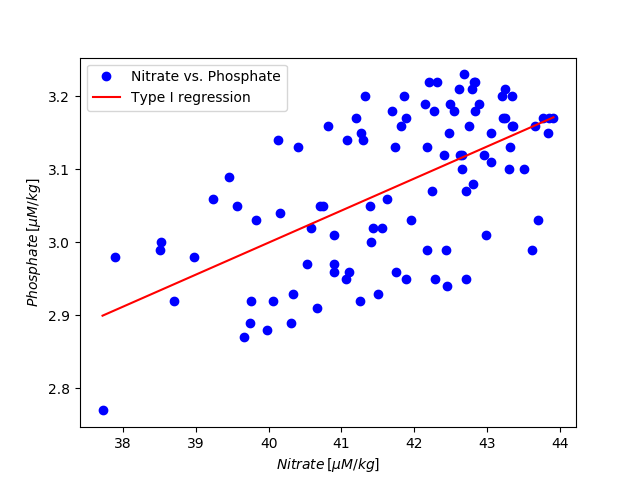

The regression returns LinregressResult(slope=0.043871126515042776, intercept=1.2448695063677937, rvalue=0.60128606263982387, pvalue=3.7167329001359628e-11, stderr=0.0058891115600314169)


In [40]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# Get rid of rows with nan for either value
good = df.dropna(subset=['NITRAT', 'PHSPHT'])
# And only look at 500 dbar and deeper.
good = good[good['CTDPRS'] >= 500]

# Scatter plot the values.
plt.figure()
plt.plot(good['NITRAT'], good['PHSPHT'], 'bo', label='Nitrate vs. Phosphate')

# Get parameters for a Type I regression.
regression = stats.linregress(good['NITRAT'], good['PHSPHT'])
slope = regression.slope
intercept = regression.intercept
print('The regression returns', regression)
# Draw a line between two points to show the regression line.
xrange = np.array([min(good['NITRAT']), max(good['NITRAT'])])
y = slope * xrange + intercept
plt.plot(xrange, y, 'r-', label='Type I regression')
plt.xlabel('$Nitrate \/[\mu M/kg]$')
plt.ylabel('$Phosphate \/[\mu M/kg]$');
plt.legend()

<IPython.core.display.Javascript object>


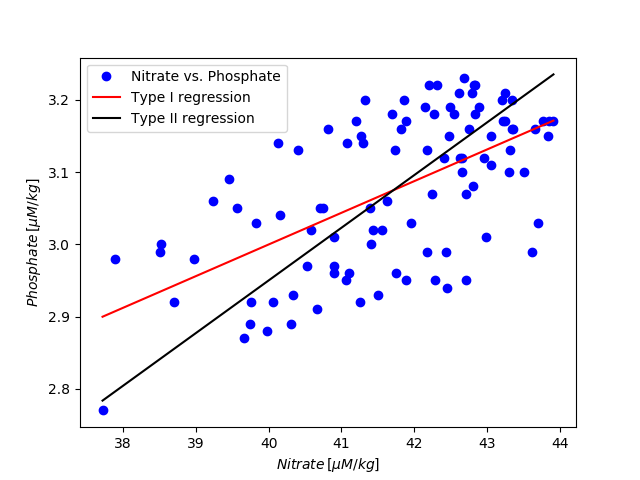

In [41]:
from regress import type2regress
# Repeat the previous figure and the add the new regression line.
# I tried and failed to find a way to make a copy of the previous
# figure and modify it, rather than building it over again.
plt.figure()
plt.plot(good['NITRAT'], good['PHSPHT'], 'bo', label='Nitrate vs. Phosphate')
plt.plot(xrange, y, 'r-', label='Type I regression')
plt.xlabel('$Nitrate \/[\mu M/kg]$')
plt.ylabel('$Phosphate \/[\mu M/kg]$')

# Now get the slope and intercept using type II regression.
[slope2, intercept2] = type2regress(good['NITRAT'], good['PHSPHT'])
# Compute endpoints for the line using the same x endpoints as before
y2 = slope2 * xrange + intercept2
# Plot the new line
plt.plot(xrange, y2, 'k-', label='Type II regression')
plt.legend();

In part 1, the nitrate/phosphate regression returned an r value of 0.601 with a p-value of 3.7E-11.  This suggests that even though the correlation is not very strong (that is, it doesn't come close to explaining all of the variation), it is highly significant.

A Type II regression model is more appropriate, assuming that both variables subject to substantial random variation or measurement error.

Nitrate and phosphate tend to correlate because both are added to the ocean from terrestrial runoff, both are found in higher concentrations in the deep ocean, and both are consumed as important nutrients for phytoplankton.  I am less confident about why there is so much scatter. 

